In [2]:
from models.stable_diffusion import model_loader, pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"
ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
# elif (torch.has_mps or torch.backend.mps.is_available()) and ALLOW_MPS:
#     DEVICE = "mps"

print(f"Using device {DEVICE}")




Using device cpu


/home/aiden/Documents/cs/Stable_Diffusion/.conda/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
tokenizer = CLIPTokenizer("tokenizer/tokenizer_vocab.json", merges_file="tokenizer/tokenizer_merges.txt")
model_filepath = "pretrained/v1-5-pruned-emaonly.ckpt"


In [4]:

models = model_loader.preload_models_from_weights(model_filepath, DEVICE)

This is for Stable Diffusion Text to Image.

In [5]:
# Text to image
prompt = "A cat jumping up, highly detailed, ultra sharp, cinematic, 8k resolution"
negative_prompt = "A dog"
cfg = True
cfg_scale = 7

# Image to image
input_image = None
img_path = ""
# input_image = Image.open(img_path)
strength = 0.9


100%|██████████| 5/5 [00:19<00:00,  3.90s/it]


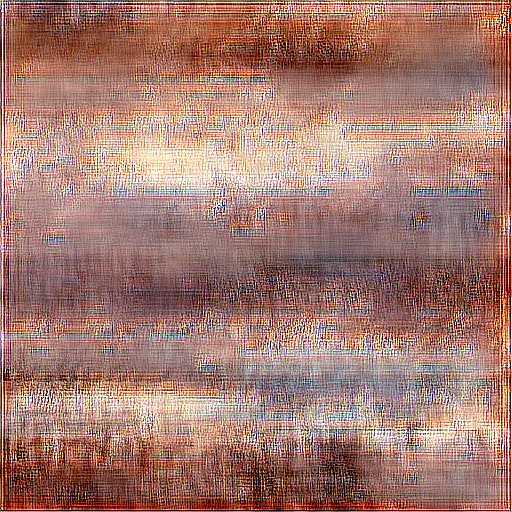

In [6]:
sampler = "ddpm"
# Try 50 for better results
num_inference_steps = 5 # with the limited amount of memory on my device, I can only do 4
seed = 22

output_image = pipeline.generate(
    prompt=prompt,
    unconditional_prompt=negative_prompt,
    input_image=input_image,
    strength=strength,
    cfg=cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer
)

Image.fromarray(output_image)